## Exploration data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/medical_cases.csv')
raw_data

,description,transcription,sample_name,medical_specialty,keywords
0,Patient having severe sinusitis about two to t...,"HISTORY:, I had the pleasure of meeting and e...",Chronic Sinusitis,Allergy / Immunology,NaN
1,A female for a complete physical and follow up...,"SUBJECTIVE: , This is a 42-year-old white fema...",Followup on Asthma,Allergy / Immunology,NaN
2,Mother states he has been wheezing and coughing.,"CHIEF COMPLAINT: , This 5-year-old male presen...",Asthma in a 5-year-old,Allergy / Immunology,NaN
3,"Acute allergic reaction, etiology uncertain, h...","HISTORY: , A 34-year-old male presents today s...",Allergy Evaluation Consult,Allergy / Immunology,NaN
4,"The patient died of a pulmonary embolism, the ...","SUMMARY OF CLINICAL HISTORY:, The patient was...",Autopsy - 8,Autopsy,NaN
...,...,...,...,...,...
3169,Psychiatric History and Physical - Patient wit...,"HISTORY OF PRESENT ILLNESS: , This 40-year-old...",Psych H&P - 2,Consult - History and Phy.,"consult - history and phy., history of present..."
3170,The patient had temperature of 104 degrees F. ...,"HISTORY OF PRESENT ILLNESS: , This is a 76-yea...",Gen Med Consult - 48,Consult - History and Phy.,"consult - history and phy., inflammatory, dege..."
3171,"Patient with a diagnosis of pancreatitis, deve...","HISTORY:, The patient was in the intensive ca...",Nephrology Consultation - 3,Consult - History and Phy.,"consult - history and phy., intubated, consult..."
3172,Consultation because of irregular periods and ...,She started her periods at age 13. She is com...,OB/GYN Consultation - 3,Consult - History and Phy.,"consult - history and phy., irregular periods,..."


Counting words, sentences and categories

In [3]:
from src.data_cleaning import count_sentences, count_words


raw_data = raw_data[raw_data['transcription'].notna()]
data = raw_data[['transcription', 'medical_specialty']]

print(
    'Number of sentences in transcriptions column: %d' % count_sentences(
        data['transcription'].tolist()),
    'Number of unique words in transcriptions column: %d' % count_words(
        data['transcription'].tolist()),
    sep='\n',
)

data_categories = data.groupby('medical_specialty')

print('\nOriginal Categories:')
for i, k in enumerate(data_categories):
    c_name, c_data = k
    print('Category %d: %s %d' % (i, c_name, len(c_data)))

[nltk_data] Downloading package punkt to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eshevlyakov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of sentences in transcriptions column: 105143
Number of unique words in transcriptions column: 33858

Original Categories:
Category 0: Allergy / Immunology 7
Category 1: Autopsy 8
Category 2: Cardiovascular / Pulmonary 471
Category 3: Consult - History and Phy. 605
Category 4: Cosmetic / Plastic Surgery 27
Category 5: Dentistry 28
Category 6: Dermatology 29
Category 7: Diets and Nutritions 10
Category 8: ENT - Otolaryngology 69
Category 9: Emergency Room Reports 75
Category 10: Endocrinology 19
Category 11: Gastroenterology 196
Category 12: General Medicine 242
Category 13: Hematology - Oncology 94
Category 14: Hospice - Palliative Care 6
Category 15: Lab Medicine - Pathology 8
Category 16: Nephrology 57
Category 17: Neurology 234
Category 18: Neurosurgery 96
Category 19: Obstetrics / Gynecology 162
Category 20: Office Notes 58
Category 21: Ophthalmology 63
Category 22: Orthopedic 358
Category 23: Pediatrics - Neonatal 39
Category 24: Physical Medicine - Rehab 12
Category 25: Po

## Cleaning data

Deleting rare categories

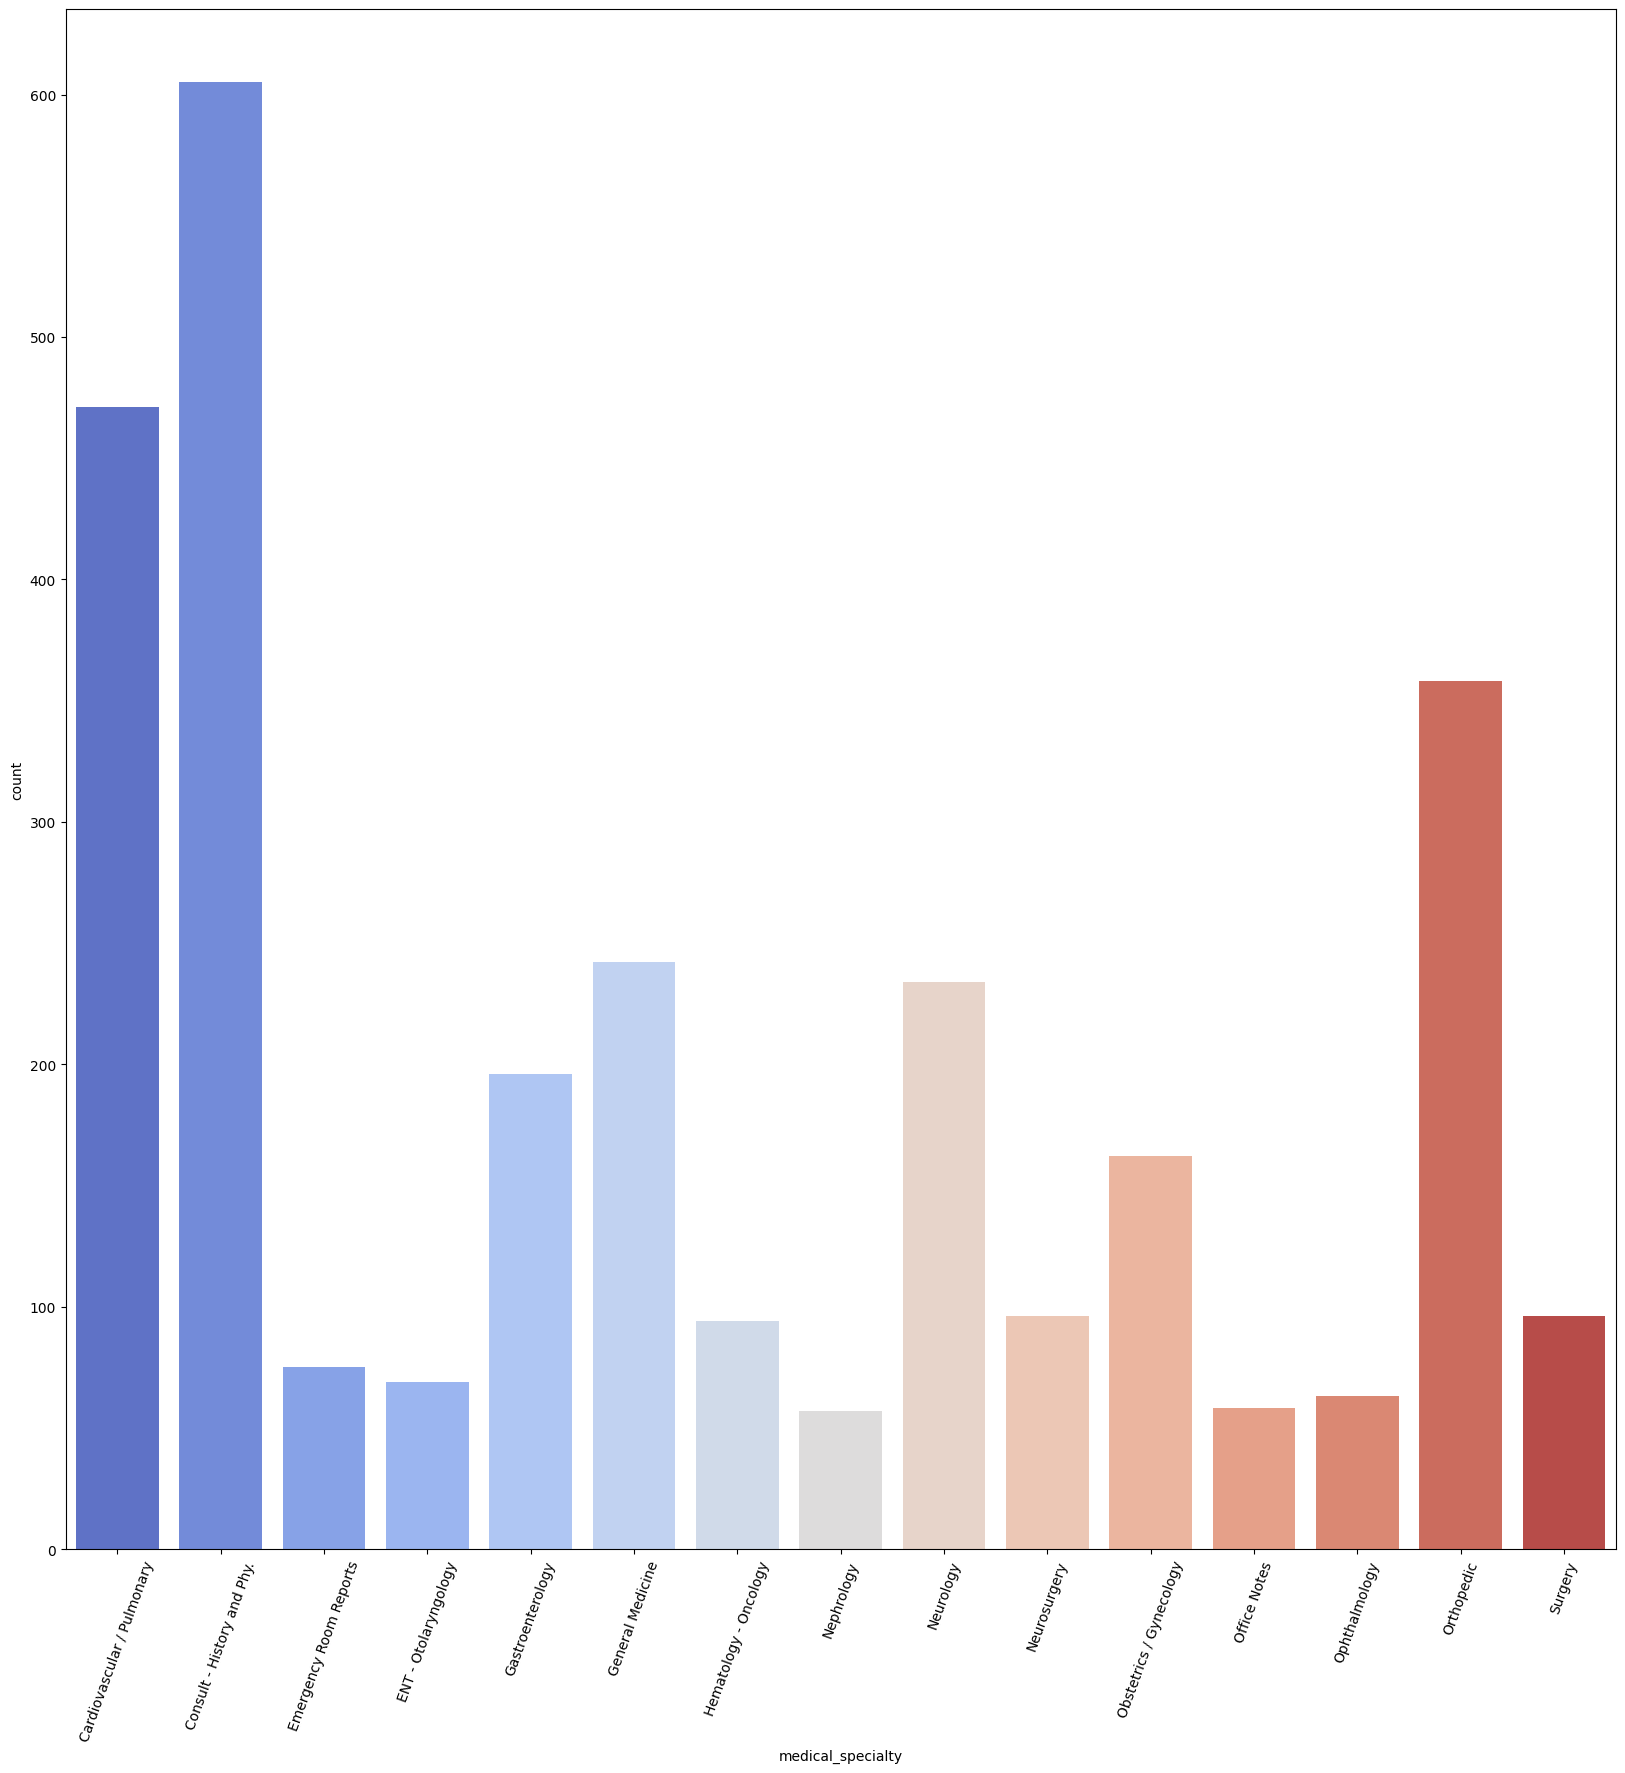

,transcription,medical_specialty
12,"REASON FOR CONSULTATION:, Ventricular ectopy ...",Cardiovascular / Pulmonary
13,"CHIEF COMPLAINT:, ""Trouble breathing."",HISTORY...",Cardiovascular / Pulmonary
14,"EXAM: , Transesophageal echocardiogram and dir...",Cardiovascular / Pulmonary
15,"HISTORY: ,I had the pleasure of meeting and e...",Cardiovascular / Pulmonary
16,"On review of systems, the patient admits to hy...",Cardiovascular / Pulmonary
...,...,...
3169,"HISTORY OF PRESENT ILLNESS: , This 40-year-old...",Consult - History and Phy.
3170,"HISTORY OF PRESENT ILLNESS: , This is a 76-yea...",Consult - History and Phy.
3171,"HISTORY:, The patient was in the intensive ca...",Consult - History and Phy.
3172,She started her periods at age 13. She is com...,Consult - History and Phy.


In [4]:
data = data_categories.filter(lambda x: x.shape[0] > 50)

plt.figure(figsize=(20,20))
sns.countplot(data=data, x='medical_specialty', palette ='coolwarm')
plt.xticks(rotation=70)
plt.show()

data

Transcriptions cleaning

In [5]:
print('~~~~~~BEFORE~~~~~~',  data.iloc[125]['transcription'], '\n', sep='\n')

from src.data_cleaning import clean_text
data['transcription'] = data.loc[:, 'transcription'].apply(clean_text)

print('~~~~~~AFTER~~~~~~', data.iloc[125]['transcription'], '\n', sep='\n')

~~~~~~BEFORE~~~~~~
IDENTIFYING DATA:,  This is a 40-year-old male seen today for a 90-day revocation admission.  He had been reported by his case manager as being noncompliant with medications, refusing oral or IM medications, became agitated, had to be taken to ABCD for evaluation, admitted at that time to auditory hallucinations and confusion and was committed for admission at this time.  He has a psychiatric history of schizophrenia, was previously admitted here at XYZ on 12/19/2009, had another voluntary admission in ABCD in 1998.,MEDICATIONS: , Listed as Invega and Risperdal.,ALLERGIES: , None known to medications.,PAST MEDICAL HISTORY:  ,The only identified problem in his chart is that he is being treated for hyperlipidemia with gemfibrozil.  The patient is unaware and cannot remember what medications he had been taking or whether he had been taking them at all as an outpatient.,FAMILY HISTORY: , Listed as unknown in the chart as far as other psychiatric illnesses.  The patient h

## Vectorization with TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

from src.reporting import vectorization_results

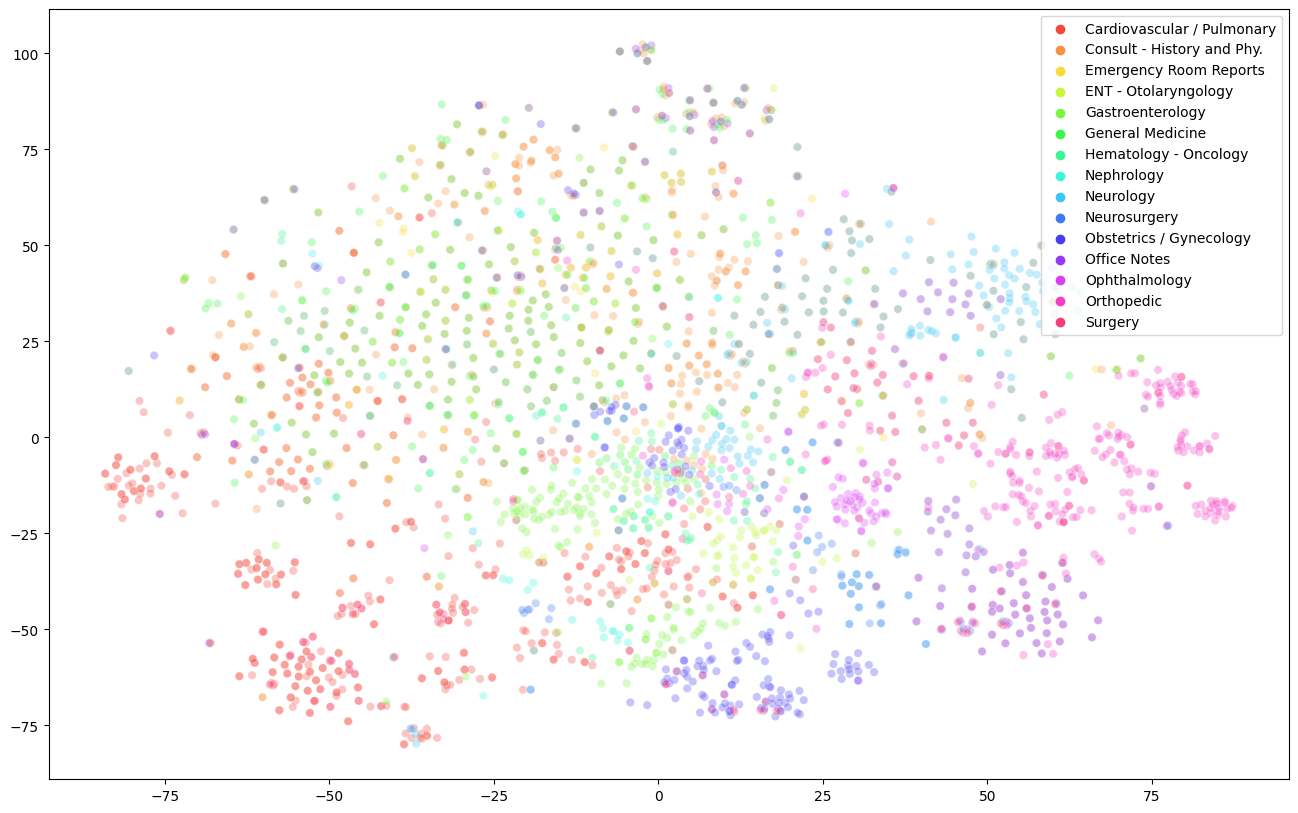

In [7]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
docterm_matrix = vectorizer.fit_transform(data['transcription'].tolist())

vectorization_results(docterm_matrix.toarray(), data['medical_specialty'].tolist())

## Modeling with logistic regression

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src.reporting import learning_results

In [9]:
pca = PCA(n_components=0.9)
docterm_matrix_reduced = pca.fit_transform(docterm_matrix.toarray())

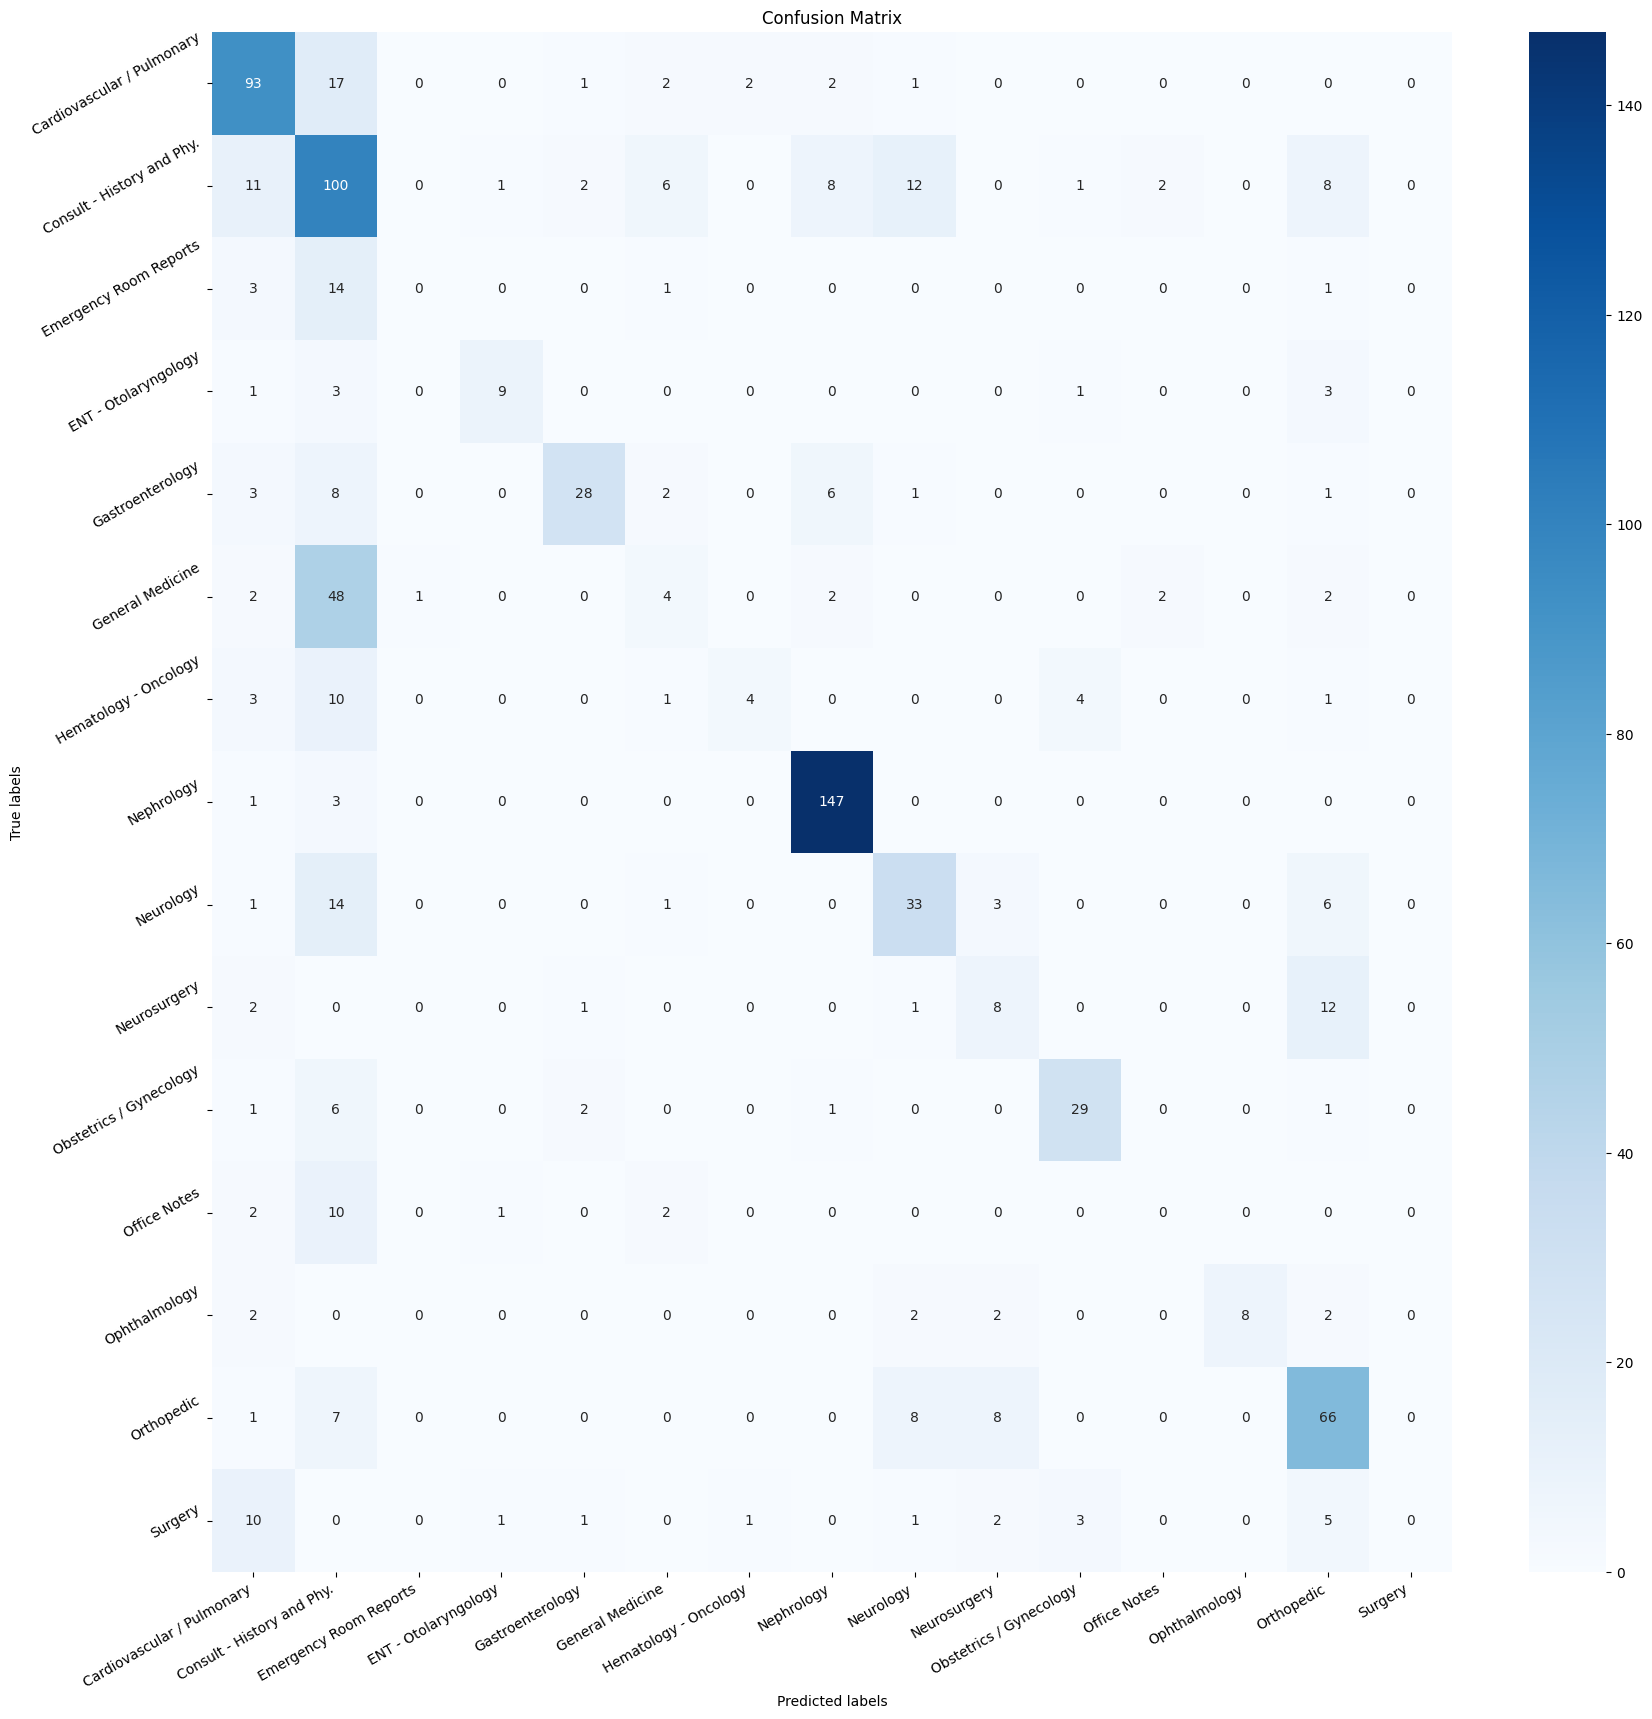

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.68      0.79      0.73       118
Consult - History and Phy.       0.42      0.66      0.51       151
    Emergency Room Reports       0.00      0.00      0.00        19
      ENT - Otolaryngology       0.75      0.53      0.62        17
          Gastroenterology       0.80      0.57      0.67        49
          General Medicine       0.21      0.07      0.10        61
     Hematology - Oncology       0.57      0.17      0.27        23
                Nephrology       0.89      0.97      0.93       151
                 Neurology       0.56      0.57      0.56        58
              Neurosurgery       0.35      0.33      0.34        24
   Obstetrics / Gynecology       0.76      0.72      0.74        40
              Office Notes       0.00      0.00      0.00        15
             Ophthalmology       1.00      0.50      0.67        16
                Orthopedic       0.61      0.73

In [10]:
labels, category_list = data['medical_specialty'].tolist(), data['medical_specialty'].unique()
from imblearn.over_sampling import SMOTE
smote_over_sample = SMOTE(sampling_strategy='minority')

x, y = smote_over_sample.fit_resample(docterm_matrix_reduced, labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)   

#x_train, x_test, y_train, y_test = train_test_split(docterm_matrix_reduced, labels, stratify=labels, random_state=1)

clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

learning_results(y_test, y_test_pred, category_list)

## SVM

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [13]:
predictions_SVM = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
acc=accuracy_score(predictions_SVM, y_test)*100
print("SVM Accuracy Score -> ", acc)

SVM Accuracy Score ->  62.383177570093466


## Improving model

### Manipulations with categories

In [11]:
data2 = data.copy()

# data2['medical_specialty'] = data2['medical_specialty'].apply(lambda x:str.strip(x))

# rebuild_categories = [
#         'Surgery', 
#         'SOAP / Chart / Progress Notes', 
#         'Office Notes', 
#         'Consult - History and Phy.', 
#         'Emergency Room Reports',
#         'Discharge Summary',
#         'Pain Management',
#         'General Medicine',
# ]

# for category in rebuild_categories:
#     mask = data2['medical_specialty'] == category
#     data2 = data2[~mask]


# mask = data2['medical_specialty'] == 'Surgery'
# data2 = data2[~mask]
# #final_data2 = data2.groupby(data2['medical_specialty'])

# mask = data2['medical_specialty'] == 'Neurosurgery'
# data2.loc[mask, 'medical_specialty'] = 'Neurology'

# mask = data2['medical_specialty'] == 'Nephrology'
# data2.loc[mask, 'medical_specialty'] = 'Urology'

# plt.figure(figsize=(10, 10))
# sns.countplot(y='medical_specialty', data=data2)
# plt.show()

# data2